1001
(0.104519749603+0.994522811173j)
[  1.50000000e+01   0.00000000e+00   8.00000000e+00   0.00000000e+00
   1.00000000e+04   3.00000000e+03   1.00000000e+00  -5.49782000e-01]


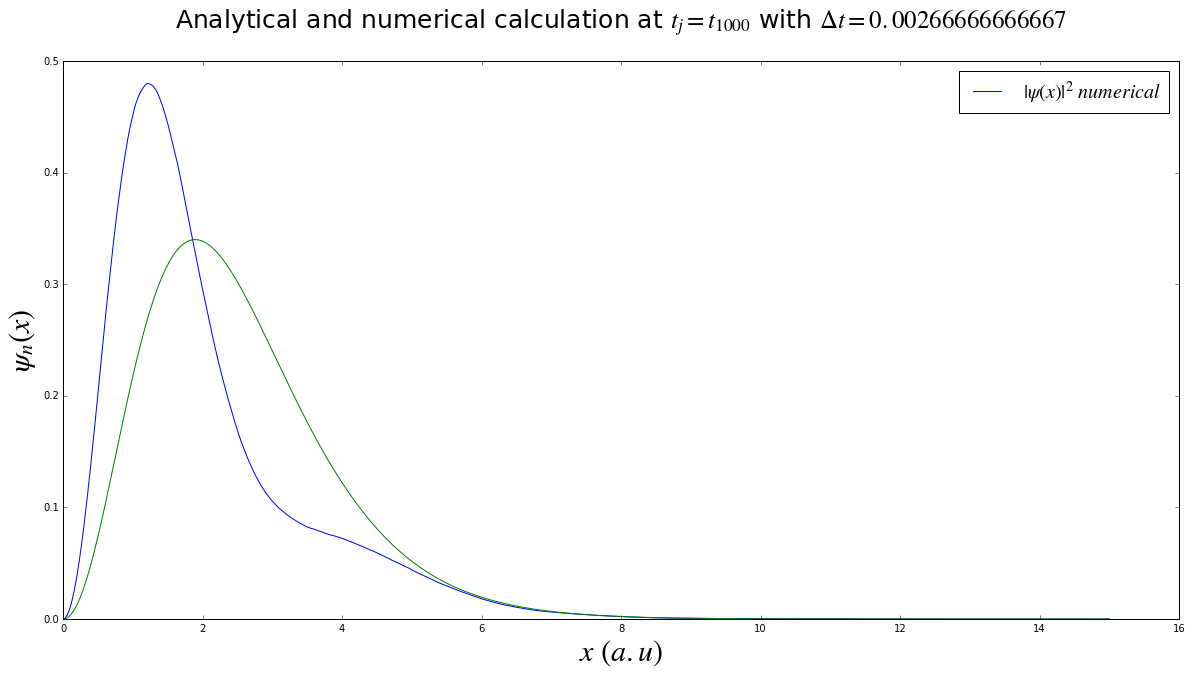

In [51]:
import numpy as np 

import matplotlib.pyplot as plt
import matplotlib as mpl
import h5py
import cmath
%matplotlib inline
mpl.rcParams["mathtext.fontset"] = "stix"

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
floc = "../../build/res.h5"
file = h5py.File(floc)

t = 1001
dstr =  "/dset"+str(t)
r = "real"
im = "img"
#e = (dstr+r) in file
#print(e)
dsetr = np.array(file[dstr+r])
dseti = np.array(file[dstr+im])
param = np.array(file["/params"])



x = np.linspace(param[1],param[0],param[4])


#ax.plot(x, dsetr, label = "$\mathfrak{Re}\{ \psi_n \} \ numerical $")
#ax.plot(x, dseti, label = "$\mathfrak{Im}\{ \psi_n \} \ numerical $")
ax.plot(x, dsetr**2+dseti**2, label = "$|\psi(x)|^2 \ numerical$")
i = 1
dstr =  "/dset"+str(i)
dsetr2 = np.array(file[dstr+r])
dseti2 = np.array(file[dstr+im])
E = -0.549782 #param[-1]
dt = (param[2] - param[3])/param[5]
psi = dsetr2 + 1j * dseti2

i =  t
#i = np.int32(np.pi/(dt*E))

print(i)
t -= 1
U = np.exp(-1j* E * t * dt)
#U = -np.sin(E*t*dt)
i = t
psi = psi*U

print(U)
print(param)

#plt.plot(x, np.abs(psi.imag-dseti), "--",label = " $\Delta \mathfrak{Im}\{\psi_n\}$")
#ax.plot(x,psi.real, label = "$\mathfrak{Re}\{\psi_{n}\} \ analytical$")
#ax.plot(x, psi.imag, label = "$\mathfrak{Im}\{ \psi_n \} \ analytical $")
ax.plot(x, psi.real**2+psi.imag**2)
ax.set_xlabel("$x \ (a.u)$", size = 30)
ax.set_ylabel("$\psi_n(x)$", size = 30)
ax.set_title("Analytical and numerical calculation at $t_j = t_{"+str(i)+"}$ with $ \Delta t ="+str(dt)+"$",
          size = 25, y = 1.05)
plt.legend(loc="best",prop={'size':20})
plt.show()




file.close()